In [12]:
#DBSCAN mean create a cluster based on density,where more the points in a particular area have more the density
#Eps :epselon is the radius of a random data point(core point) in a circle,point less then core pint fall into the circle
#MinPts:the number of points in a circle(core point) should be  equal or more then MinPts value
#the data point,neighbour of a core point called boundary point
#noise point:neigther core point a boundary point(outlier)
#if the data point are neighbour then they are put into same cluster 
#DBscma:density base spatial clustering of application with noice 
#unsupervised algoritham
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
data=pd.read_csv("C:/Users/dheve/OneDrive/Desktop/course/Mall_Customers.csv")
data.head(4)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77


In [5]:
data.rename(columns={'Annual Income (k$)':'income','Spending Score (1-100)':'spendingscore'},inplace=True)
data.head(10)

,CustomerID,Gender,Age,income,spendingscore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


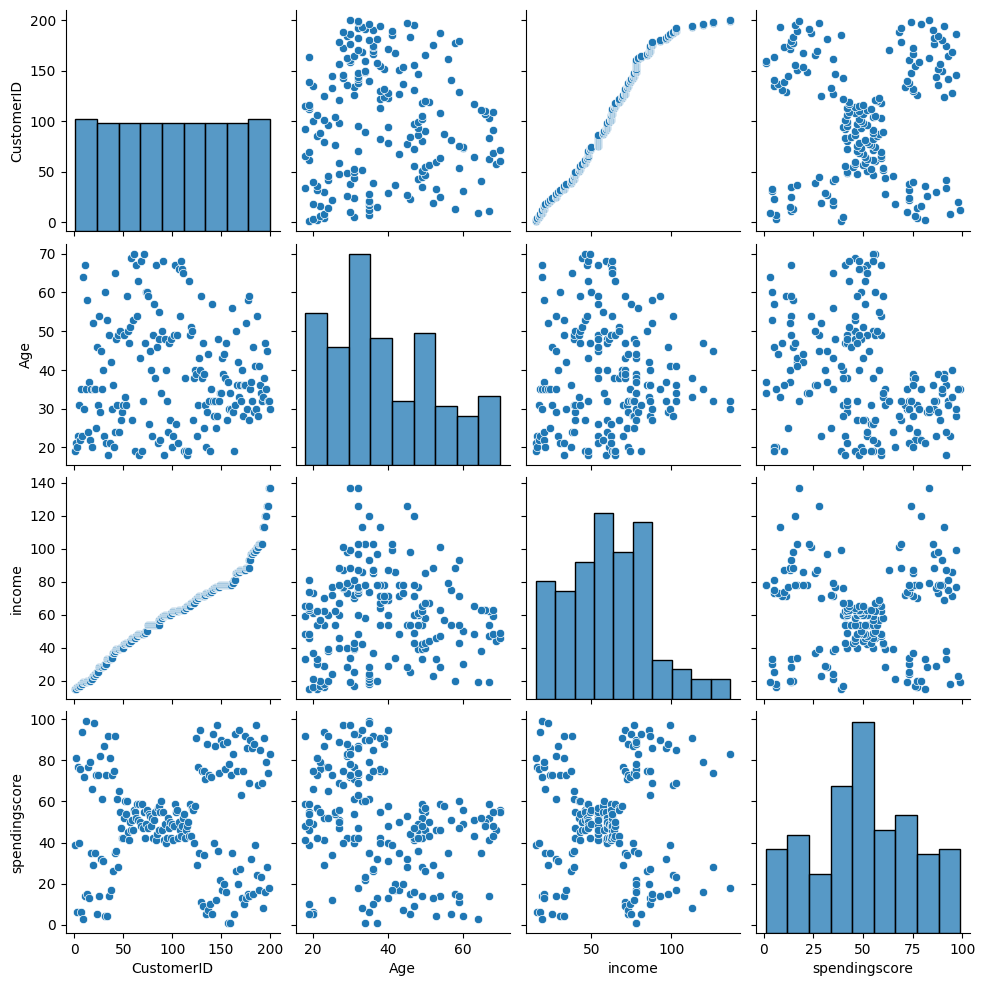

In [6]:
sns.pairplot(data)

In [13]:
data = data.drop('CustomerID', axis=1)
data.corr(numeric_only=True)

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


([<matplotlib.patches.Wedge at 0x156e9aebaa0>,
 [Text(-0.536645617860466, -0.9602142890163419, 'Female'),
  Text(0.5366456178604662, 0.9602142890163418, 'Male')],
 [Text(-0.2927157915602542, -0.5237532485543682, '56.0%'),
  Text(0.29271579156025423, 0.5237532485543681, '44.0%')])

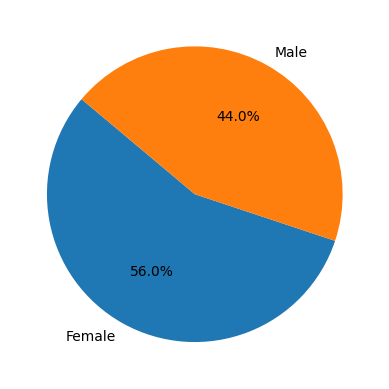

In [17]:
gender_counts = data['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)

In [24]:
x=data.iloc[:,2:].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [25]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=3,min_samples=4,metric="euclidean")
db

DBSCAN(eps=3, min_samples=4)

In [28]:
model=db.fit(x)
label=model.labels_
label
#-1 is for noice

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  0,  0,  0,  0, -1, -1,  0, -1,  0, -1,  0,  0,
       -1,  0, -1, -1,  0, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  2,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  2,
        3,  3, -1,  3, -1, -1,  4, -1, -1, -1,  4,  5,  4, -1,  4,  5, -1,
        5,  4, -1,  4,  5, -1, -1,  6, -1, -1, -1,  7, -1,  6, -1,  6, -1,
        7, -1,  6, -1,  7, -1,  7, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        8, -1,  8, -1,  8, -1,  8, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [32]:
from sklearn import metrics
sample_cores=np.zeros_like(label,dtype=bool)
sample_cores[db.core_sample_indices_]=True

In [36]:
n_clusters_ = len(set(label)) - (1 if -1 in label else 0)
print('No of cluster:',n_clusters_)

No of cluster: 9


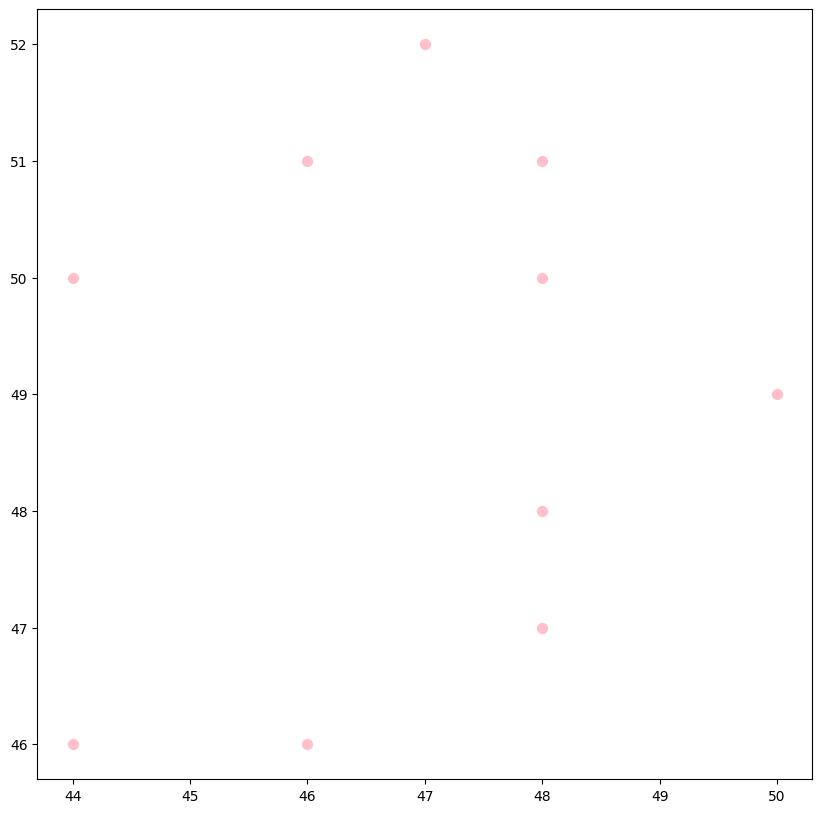

In [39]:
y_means=db.fit_predict(x)
plt.figure(figsize=(10,10))
plt.scatter(x[y_means==0,0],x[y_means==0,1],s=50,c='pink')